# Ames City Housing Price Dataset Exploration

## Importing required libraries

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

## Importing Data

### Importing Training Data

In [117]:
train_data = pd.read_csv('./data/train.csv')

### Importing Testing Data

In [118]:
test_data = pd.read_csv('./data/test.csv')

## Getting to know the data in hand

### Dataset Description

In [119]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### As this view does not show all the colums, we have to see the raw view of the first few colums of the data

In [120]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Cleanup

### We need to find columns with one or missing values and deal with them according to their data type

In [121]:
def get_missing_values(data):
    return train_data.columns[train_data.isnull().any()]

In [122]:
cols_with_missing_vals = get_missing_values(train_data)
print(cols_with_missing_vals)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


### Check the data type of the data in each column having missing data

In [123]:
for col in cols_with_missing_vals:
    print(f"{col}->{train_data[col].dtype}")

LotFrontage->float64
Alley->object
MasVnrType->object
MasVnrArea->float64
BsmtQual->object
BsmtCond->object
BsmtExposure->object
BsmtFinType1->object
BsmtFinType2->object
Electrical->object
FireplaceQu->object
GarageType->object
GarageYrBlt->float64
GarageFinish->object
GarageQual->object
GarageCond->object
PoolQC->object
Fence->object
MiscFeature->object


### For all the columns `LotFrontage`, `MasVnrArea` we can replace the missing values with 0

In [124]:
for col in cols_with_missing_vals:
    if col in ['LotFrontage', 'MasVnrArea']:
        train_data[col] = train_data[col].fillna(0)
    elif col == 'GarageYrBlt':
        train_data[col] = train_data[col].fillna(train_data['GarageYrBlt'].median())

### Lets see all other columns who has missing data

In [125]:
get_missing_values(train_data)

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

### Filling columns having data type

In [126]:
for col in cols_with_missing_vals:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].fillna('none')

### Lets check to see if there are any column remaining with missing values

In [127]:
get_missing_values(train_data)

Index([], dtype='object')

In [128]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,12,2008,WD,Normal,250000


In [ ]:
def clean_up_data(data):
    cols_with_missing_vals = get_missing_values(data)
    for col in cols_with_missing_vals:
        if col in ['LotFrontage', 'MasVnrArea']:
            data[col] = data[col].fillna(0)
        elif col == 'GarageYrBlt':
            data[col] = data[col].fillna(data['GarageYrBlt'].median())
        elif data[col].dtype == 'object':
            data[col] = data[col].fillna('none')
    return data

In [ ]:
cleaned_train_data = clean_up_data(train_data)
cleaned_test_data = clean_up_data(test_data)

### Data Cleanup is done. Lets see how we can handle columns having categorical data before forming the model

## Cleaned up Data

In [129]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,12,2008,WD,Normal,250000


## Categorical Data Handling

### Dummy encoding all categroical columns

In [130]:
train_data_encoded = pd.get_dummies(train_data, drop_first=True)
print(f"Shape of the encoded data: {train_data_encoded.shape}")
train_data_encoded.head()

Shape of the encoded data: (1460, 262)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


## Calculating correlations of all features to SalePrice

Summary of correlations with SalePrice:
count    261.000000
mean       0.028009
std        0.208026
min       -0.589044
25%       -0.083399
50%       -0.016754
75%        0.105222
max        0.790982
dtype: float64


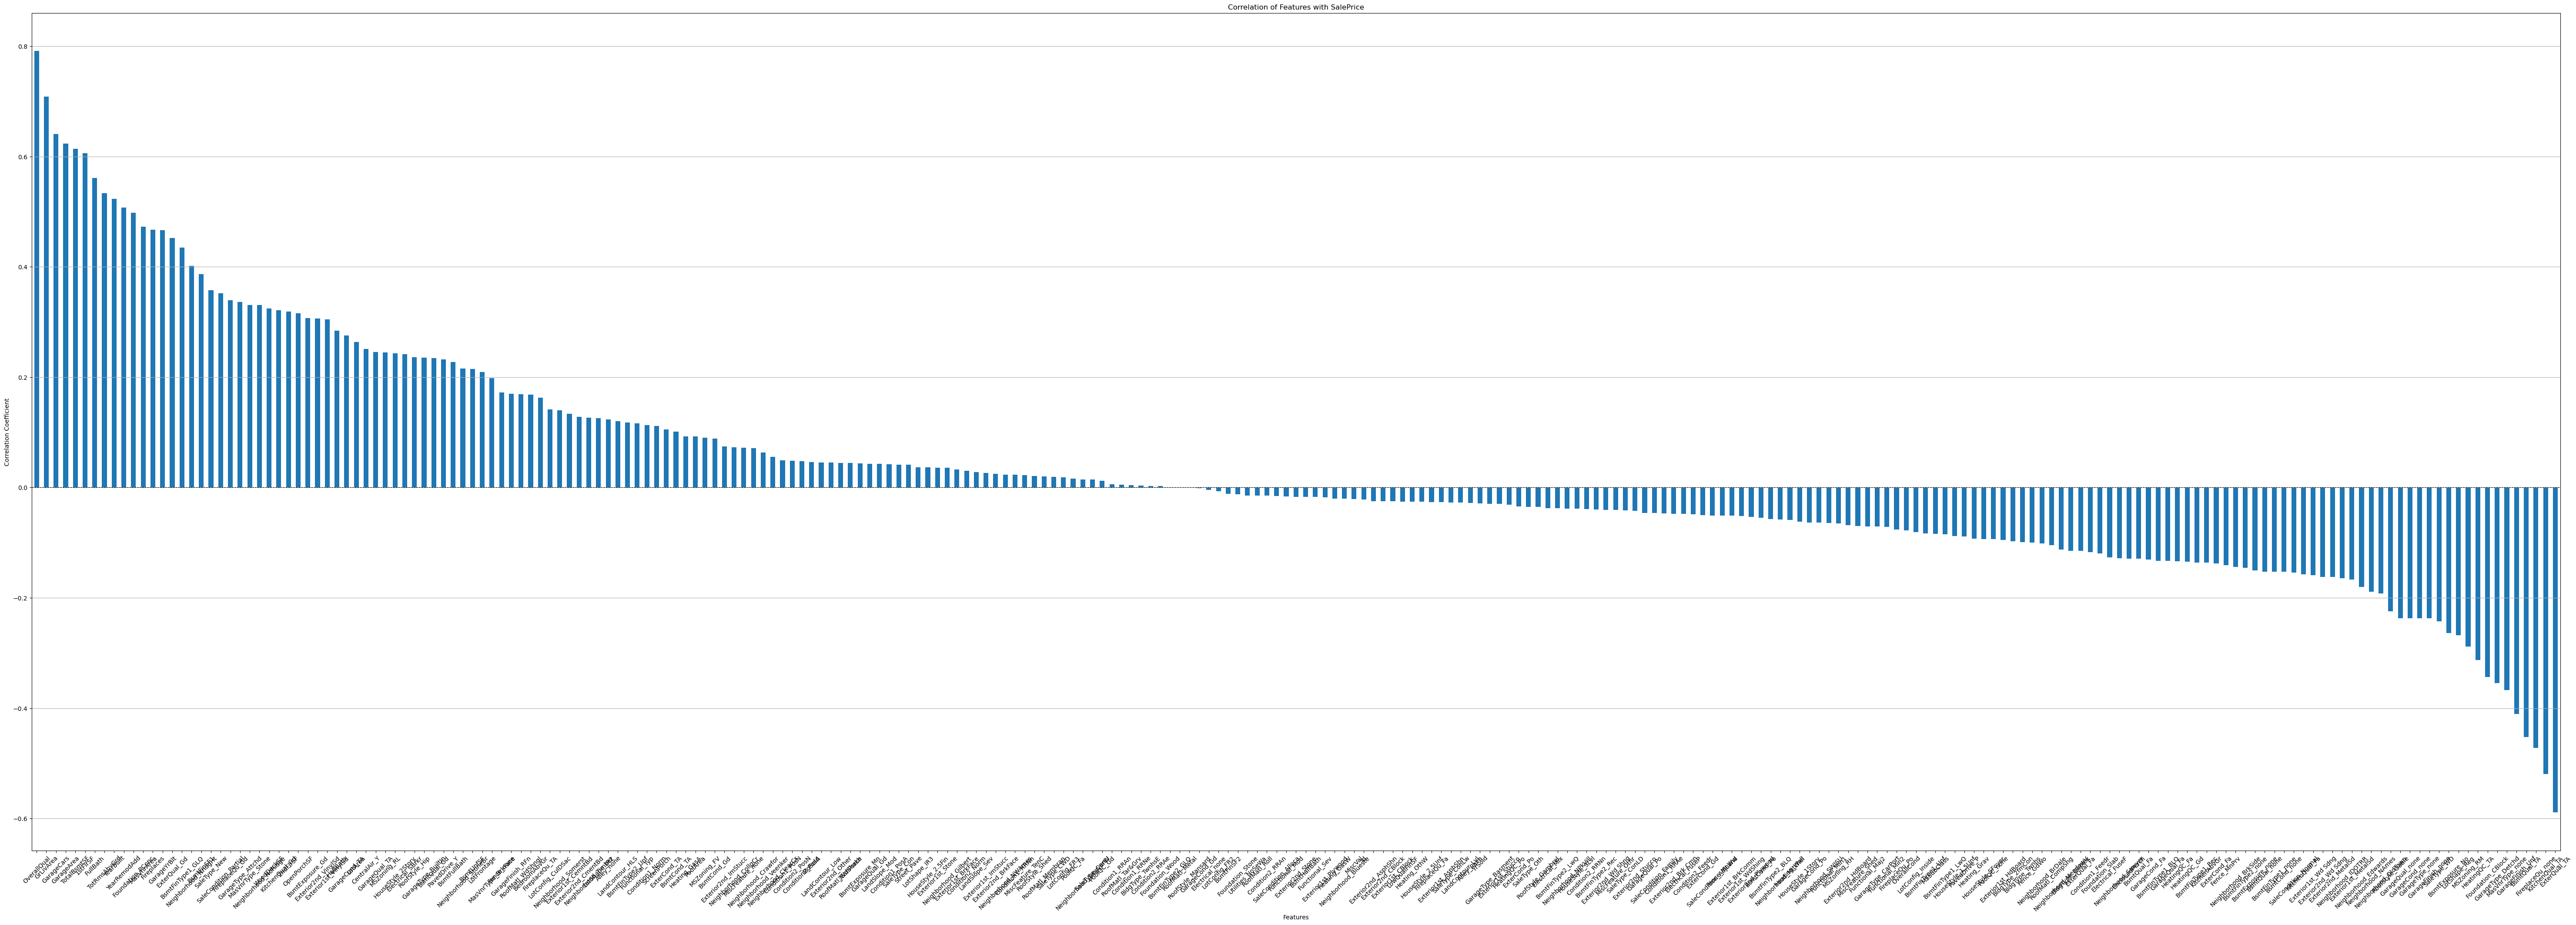

In [131]:
features_df = train_data_encoded.drop(columns=['SalePrice'])
target_df = train_data_encoded['SalePrice']
correlations_with_price = features_df.corrwith(target_df).sort_values(ascending=False)
print("Summary of correlations with SalePrice:")
print(correlations_with_price.describe())
plt.figure(figsize=(75, 25))
correlations_with_price.plot(kind='bar')
plt.title('Correlation of Features with SalePrice')
plt.grid(axis='y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.show()

## Dropping all features having correlation value less than a certain threshold

In [132]:
## lets drop all the features with correlation less than 0.1
features_to_drop = correlations_with_price[correlations_with_price.abs() < 0.1].index.tolist()
print(f"Features to drop: {features_to_drop}")
features_df = features_df.drop(columns=features_to_drop)
print(f"Shape of features after dropping low correlation features: {features_df.shape}")

Features to drop: ['Heating_GasA', 'PoolArea', 'MSZoning_FV', 'BsmtCond_Gd', 'Exterior2nd_ImStucc', 'Neighborhood_CollgCr', 'MiscFeature_none', 'Neighborhood_Crawfor', 'Neighborhood_Veenker', 'Neighborhood_ClearCr', 'Condition1_PosN', 'Condition2_PosN', 'Condition2_PosA', 'MoSold', 'LandContour_Low', 'Exterior2nd_Other', 'RoofMatl_WdShake', '3SsnPorch', 'BsmtExposure_Mn', 'GarageQual_Gd', 'LandSlope_Mod', 'Condition1_PosA', 'SaleType_Con', 'Street_Pave', 'LotShape_IR3', 'HouseStyle_2.5Fin', 'Exterior1st_Stone', 'Neighborhood_Gilbert', 'Exterior1st_BrkFace', 'Condition2_Norm', 'LandSlope_Sev', 'Exterior1st_ImStucc', 'Exterior2nd_BrkFace', 'Neighborhood_NWAmes', 'Condition1_RRNn', 'MiscFeature_TenC', 'RoofStyle_Shed', 'RoofMatl_Membran', 'SaleType_CWD', 'LotConfig_FR3', 'PoolQC_Fa', 'Neighborhood_SawyerW', 'SaleType_ConLI', 'PoolQC_Gd', 'Condition1_RRAn', 'RoofMatl_Tar&Grv', 'Condition1_RRNe', 'BldgType_TwnhsE', 'Condition2_RRAe', 'Foundation_Wood', 'BsmtFinType2_GLQ', 'RoofMatl_Metal', 

## Starting to model now

### Scaling Training Data

In [133]:
scaler = StandardScaler()
scaler.fit(features_df)
scaled_features = scaler.transform(features_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_df.columns)

In [135]:
model = RandomForestRegressor()
model.fit(scaled_features_df, target_df)
print("Model training completed.")

Model training completed.
